# Titanic Kaggle Competition

[Competition link](https://www.kaggle.com/c/titanic)

In [47]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [48]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [49]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

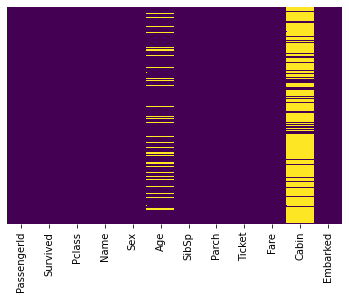

In [50]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

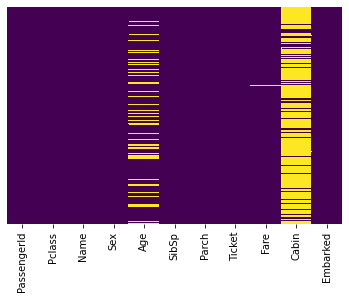

In [51]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Lost Fare input

In [52]:
test_df.loc[test_df['Fare'].isnull(), 'Fare'] =  test_df[(test_df['Pclass'] == 3) & (test_df['Embarked'] == 'S')].Fare.mean()

#### Lost Age input

In [53]:
age_imputer = SimpleImputer(strategy='mean', missing_values = np.nan)

train_df['new_age'] = age_imputer.fit_transform(train_df[['Age']]) 
test_df['new_age'] = age_imputer.fit_transform(test_df[['Age']]) 

train_df.drop(labels = ['Age'], axis = 1, inplace = True) 
test_df.drop(labels = ['Age'], axis = 1, inplace = True) 

#### Get Title from Name

In [54]:
train_df['Title'] = train_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [55]:
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [57]:
train_df['Title'] = train_df['Title'].map(normalized_titles)
test_df['Title'] = test_df['Title'].map(normalized_titles)

#### Get Deck from Cabin

In [58]:
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown')

train_df['Deck'] = train_df['Cabin'].map(lambda x: x[0])
test_df['Deck'] = test_df['Cabin'].map(lambda x: x[0])

#### Check nan 


<AxesSubplot:>

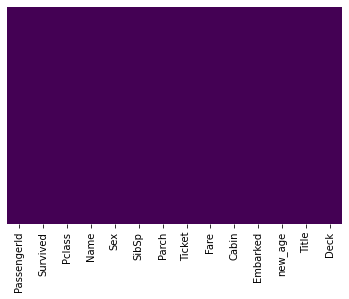

In [59]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


<AxesSubplot:>

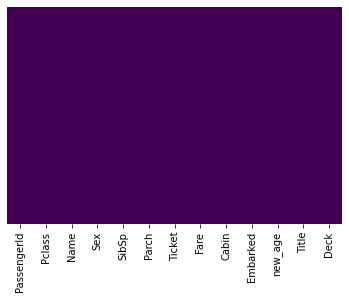

In [60]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Encoding

In [61]:
le = LabelEncoder()

train_df['Deck'] = le.fit_transform(train_df['Deck'])
test_df['Deck'] = le.fit_transform(test_df['Deck'])

train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] =  le.fit_transform(test_df['Sex'])

train_df['Title'] = le.fit_transform(train_df['Title'])
test_df['Title'] = le.fit_transform(test_df['Title'])

#### Model cross-validation, fitting, making prediction

In [70]:
X = train_df[['Pclass','Sex', 'new_age', 'SibSp', 'Parch', 'Fare', 'Deck', 'Title']]
y = train_df['Survived']

In [71]:
cv = 5

In [72]:
random_forest = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=8, min_samples_leaf=2)

scores = cross_val_score(random_forest, X, y, cv=cv, scoring='accuracy')

print('%0.2f accuracy with a standard deviation of %0.2f' % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.03


In [73]:
random_forest.fit(X, y)

prediction = random_forest.predict(test_df[['Pclass','Sex', 'new_age', 'SibSp', 'Parch', 'Fare', 'Deck', 'Title']])

In [74]:
submission = pd.DataFrame(test_df['PassengerId'], columns=['PassengerId'])
submission['Survived'] = prediction

In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
submission.to_csv('data/submission.csv', index=False)

### Results 

* Public score: 0.77511 
* f1: 0.77
* Accuracy: 0.84